# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import geocoder
from geopy.geocoders import Nominatim 
import requests
import json

from sklearn.cluster import KMeans

import folium

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot')

# Creating variables for connecting the Foursquare API

In [2]:
CLIENT_ID = 'YUWXSYB4B4HPPZF3GSL5I32P4N5SXLELTIZ3IO0XPSN1RYI5'
CLIENT_SECRET = '51DJZCOWAOESTODWSI3M2BYMOEH4RXH0N2SG1Q4O5JNXTPYP' 
VERSION = '20190417' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YUWXSYB4B4HPPZF3GSL5I32P4N5SXLELTIZ3IO0XPSN1RYI5
CLIENT_SECRET:51DJZCOWAOESTODWSI3M2BYMOEH4RXH0N2SG1Q4O5JNXTPYP


# Web Scraping the Mumbai neighbourhod database

In [3]:
df = pd.read_html('https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/')
df = df[0]
df

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai
5,Ambewadi,400004,Maharashtra,Mumbai
6,Andheri,400053,Maharashtra,Mumbai
7,Andheri East,400069,Maharashtra,Mumbai
8,Andheri Railway station,400058,Maharashtra,Mumbai
9,Antop Hill,400037,Maharashtra,Mumbai


In [4]:
df.rename(columns={"Pincode Details": "Location", "Pincode Details.1": "Pincode"}, inplace=True)
df.drop(["Pincode Details.2","Pincode Details.3"], axis=1, inplace=True)
df.drop([0], inplace=True)

In [5]:
df.head()

,Location,Pincode
1,A I staff colony,400029
2,Aareymilk Colony,400065
3,Agripada,400011
4,Airport,400099
5,Ambewadi,400004


In [6]:
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai City are 18.9387711, 72.8353355.


In [7]:
address = df['Location']
pcodes = df['Pincode']
loc_latitude = []
loc_longitude = []

for A,B in zip(address,pcodes):
    try:
        A = A + ", Mumbai, maharashtra, India"
        location = geolocator.geocode(A)
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print(latitude,longitude)
        
    except Exception as e:
        print('Error --->',e)
        print(A)
        location = geolocator.geocode('{}, Mumbai, maharashtra, India'.format(B))
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print("new", latitude,longitude)
                                                                                           
df['Latitude']= loc_latitude
df['Longitude']= loc_longitude

Error ---> 'NoneType' object has no attribute 'latitude'
A I staff colony, Mumbai, maharashtra, India
new 19.151622 72.854981
Error ---> 'NoneType' object has no attribute 'latitude'
Aareymilk Colony, Mumbai, maharashtra, India
new 19.180136 72.908812
18.975302 72.824898
19.090201 72.863808
19.186776 72.859313
19.119698 72.84642
19.115883 72.854202
19.119698 72.84642
19.020761 72.865256
18.900689 72.816134
19.128315 72.840038
19.101937 72.861599
18.937132 72.832556
Error ---> 'NoneType' object has no attribute 'latitude'
B.P.lane, Mumbai, maharashtra, India
new 18.951606 72.834797
19.058336 72.830267
19.061657 72.849811
19.168814 72.833678
18.928665 72.832264
19.152814 72.839021
19.06333 72.856474
19.015786 72.83737
Error ---> 'NoneType' object has no attribute 'latitude'
Bhawani Shankar rd, Mumbai, maharashtra, India
new 18.938771 72.835335
19.229068 72.857363
19.226723 72.861933
Error ---> 'NoneType' object has no attribute 'latitude'
Borvali West, Mumbai, maharashtra, India
new 19.2

new 18.916863 72.824315
19.081363 72.853893
Error ---> 'NoneType' object has no attribute 'latitude'
Vesava, Mumbai, maharashtra, India
new 19.133736 72.814877
Error ---> 'NoneType' object has no attribute 'latitude'
Vidyanagari, Mumbai, maharashtra, India
new 19.109092 72.860771
Error ---> 'NoneType' object has no attribute 'latitude'
Vileeparle (east), Mumbai, maharashtra, India
new 19.100066 72.845356
Error ---> 'NoneType' object has no attribute 'latitude'
Vileparle Railway station, Mumbai, maharashtra, India
new 19.100066 72.845356
Error ---> 'NoneType' object has no attribute 'latitude'
Vileparle(west), Mumbai, maharashtra, India
new 19.062992 73.119256
19.026919 72.875934
Error ---> 'NoneType' object has no attribute 'latitude'
Wadala Rs, Mumbai, maharashtra, India
new 19.010839 72.849727
19.011696 72.81807
19.030098 72.841636
19.007411 72.816224
Error ---> 'NoneType' object has no attribute 'latitude'
Worli Police camp, Mumbai, maharashtra, India
new 19.012654 72.819765
19.0054

In [8]:
df

,Location,Pincode,Latitude,Longitude
1,A I staff colony,400029,19.151622,72.854981
2,Aareymilk Colony,400065,19.180136,72.908812
3,Agripada,400011,18.975302,72.824898
4,Airport,400099,19.090201,72.863808
5,Ambewadi,400004,19.186776,72.859313
6,Andheri,400053,19.119698,72.846420
7,Andheri East,400069,19.115883,72.854202
8,Andheri Railway station,400058,19.119698,72.846420
9,Antop Hill,400037,19.020761,72.865256
10,Asvini,400005,18.900689,72.816134


In [9]:
# create map of toronto using latitude and longitude values
map_mum = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# add markers to map
for lat, lng, loc in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3131',
        fill_opacity=0.5,
        parse_html=False).add_to(map_mum)  
    
map_mum

In [10]:
neighborhood_latitude = df.loc[45, 'Latitude']
neighborhood_longitude = df.loc[45, 'Longitude']

neighborhood_name = df.loc[45, 'Location']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Danda are 19.076779, 72.825031.


In [11]:
LIMIT = 200
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebdf16afb34b5001b1f9409'},
 'response': {'headerLocation': 'Bandra West',
  'headerFullLocation': 'Bandra West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 19.081279004500004,
    'lng': 72.82978360886237},
   'sw': {'lat': 19.072278995499993, 'lng': 72.82027839113762}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57c81040498e1cd1383383c7',
       'name': 'Koinonia Coffee Roasters',
       'location': {'address': '66, Chuim Village Road, Danda, Pali Hill',
        'crossStreet': 'Bandra',
        'lat': 19.073263816388312,
        'lng': 72.82617788108536,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.073263816388312,
          'lng': 72.82

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.io.json.json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Koinonia Coffee Roasters,Café,19.073264,72.826178
1,Cafe Coffee Day,Café,19.074862,72.826675
2,Thalassa,Mediterranean Restaurant,19.075005,72.827050
3,Yellow Bar,Bar,19.075044,72.826775


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
Mumbai_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

A I staff colony
Aareymilk Colony
Agripada
Airport
Ambewadi
Andheri
Andheri East
Andheri Railway station
Antop Hill
Asvini
Azad Nagar
B P t colony
B.N. bhavan
B.P.lane
Bandra West
Bandra(east)
Bangur Nagar
Bazargate
Best Staff colony
Bharat Nagar
Bhawani Shankar
Bhawani Shankar rd
Borivali
Borivali East
Borvali West
C G s colony
Central Building
Century Mill
Chakala Midc
Chamarbaug
Charkop
Charni Road
Chaupati
Chinchbunder
Chinchpokli
Churchgate
Colaba
Cotton Exchange
Cumballa Hill
Cumballa Sea face
Dadar
Dadar Colony
Dahisar
Dahisar Rs
Danda
Daulat Nagar
Delisle Road
Dharavi
Dharavi Road
Dockyard Road
Dr Deshmukh marg
Falkland Road
Girgaon
Gokhale Road
Goregaon
Goregaon East
Goregaon Rs
Government Colony
Gowalia Tank
Grant Road
H.M.p. school
Haffkin Institute
Haines Road
Hajiali
Hanuman Road
High Court bulding
Holiday Camp
Irla
Ins Hamla
International Airport
J.B. nagar
J.J.hospital
Jacob Circle
Jogeshwari East
Jogeshwari West
Juhu
Kalachowki
Kalbadevi
Kamathipura
Kandivali East
Kandi

In [17]:
print(Mumbai_venues.shape)
Mumbai_venues.head()

(2755, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A I staff colony,19.151622,72.854981,China Ming,19.154614,72.856497,Chinese Restaurant
1,A I staff colony,19.151622,72.854981,Pizza Hut,19.149885,72.856264,Pizza Place
2,A I staff colony,19.151622,72.854981,Peshawari Grill,19.154210,72.856668,Indian Restaurant
3,A I staff colony,19.151622,72.854981,McDonald's,19.154511,72.856462,Fast Food Restaurant
4,A I staff colony,19.151622,72.854981,Golden Chariot,19.154864,72.856495,Indian Restaurant


In [18]:
Mumbai_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,2,2,2,2,2,2
Afghan Restaurant,1,1,1,1,1,1
Airport,8,8,8,8,8,8
Airport Lounge,2,2,2,2,2,2
Airport Service,2,2,2,2,2,2
Airport Terminal,2,2,2,2,2,2
American Restaurant,7,7,7,7,7,7
Antique Shop,1,1,1,1,1,1
Aquarium,1,1,1,1,1,1


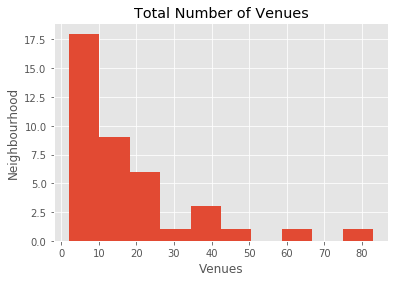

In [19]:
ax = Mumbai_venues.groupby('Neighborhood').count()
ax["Venue"].head(40).plot(kind='hist')
plt.title('Total Number of Venues')
plt.ylabel('Neighbourhood')
plt.xlabel('Venues')
plt.show()

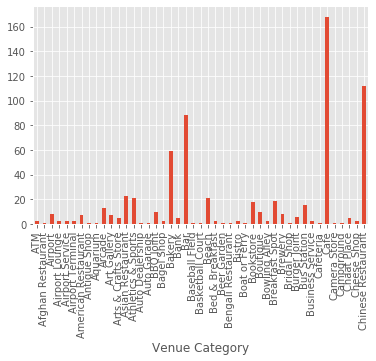

In [20]:
aa= Mumbai_venues.groupby("Venue Category").count()
aa["Venue"].head(45).plot(kind = "bar")
plt.show()

In [21]:
Mumbai_venues[Mumbai_venues["Venue Category"]=="Café"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
87,B.N. bhavan,18.937132,72.832556,Cafe Excelsior,18.937701,72.833566,Café
105,B.N. bhavan,18.937132,72.832556,Mocambo Café,18.934267,72.833698,Café
122,B.P.lane,18.951606,72.834797,Noorani Milk Centre,18.954749,72.833382,Café
128,Bandra West,19.058336,72.830267,XVII Tea Room,19.059526,72.829247,Café
138,Bandra West,19.058336,72.830267,Pali Village Café,19.062056,72.829506,Café
148,Bandra West,19.058336,72.830267,145 Bandra,19.060330,72.829571,Café
164,Bandra West,19.058336,72.830267,Chéron,19.055254,72.830645,Café
166,Bandra West,19.058336,72.830267,Di Bella Coffee,19.061036,72.832526,Café
169,Bandra West,19.058336,72.830267,Cafe Coffee Day,19.059539,72.829368,Café
184,Bandra West,19.058336,72.830267,Jam Jar Diner Bandra,19.054906,72.828484,Café


In [22]:
print('There are {} uniques categories.'.format(len(Mumbai_venues['Venue Category'].unique())))

There are 201 uniques categories.


In [23]:
Mumbai_venues['Venue Category'].unique()[:100]


array(['Chinese Restaurant', 'Pizza Place', 'Indian Restaurant',
       'Fast Food Restaurant', 'Plaza', 'Sporting Goods Shop', 'Lounge',
       'Electronics Store', 'Bakery', 'Coffee Shop', 'Athletics & Sports',
       'Soccer Field', 'Platform', 'Airport', 'Airport Service',
       'Department Store', "Women's Store", 'Clothing Store',
       'Business Service', 'Sandwich Place', 'Restaurant', 'Food Court',
       'Hotel', 'Shopping Mall', 'Camera Store', 'Wine Shop', 'Bar',
       'Gym Pool', 'Bus Station', 'Grocery Store', 'Gym / Fitness Center',
       'Trail', 'Multiplex', 'Falafel Restaurant', 'Pub',
       'Asian Restaurant', 'Snack Place', 'Vegetarian / Vegan Restaurant',
       'Burger Joint', 'Bowling Alley', 'Train Station', 'Metro Station',
       'Ice Cream Shop', 'Park', 'Café', 'Seafood Restaurant',
       'Flea Market', 'History Museum', 'Middle Eastern Restaurant',
       'BBQ Joint', 'Dessert Shop', 'American Restaurant',
       'Convenience Store', 'Indian Sweet Sho

In [24]:
# one hot encoding
M_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M_onehot['Neighborhood'] = Mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [M_onehot.columns[-1]] + list(M_onehot.columns[:-1])
M_onehot = M_onehot[fixed_columns]

M_onehot.head()

,Zoo,ATM,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Camera Store,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,Community Center,Concert Hall,Convenience Store,Convention Center,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Record Shop,Recreation Center,Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
M_grouped = M_onehot.groupby('Neighborhood').mean().reset_index()
M_grouped

,Neighborhood,Zoo,ATM,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Camera Store,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,Community Center,Concert Hall,Convenience Store,Convention Center,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Record Shop,Recreation Center,Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,A I staff colony,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [26]:
M_onehot.shape

(2755, 201)

In [27]:
M_grouped.shape

(181, 201)

In [28]:
num_top_venues = 5

for hood in M_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = M_grouped[M_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A I staff colony----
                  venue  freq
0     Indian Restaurant  0.22
1           Pizza Place  0.11
2  Fast Food Restaurant  0.11
3                 Plaza  0.11
4    Chinese Restaurant  0.11


----Agripada----
                venue  freq
0            Platform   0.2
1  Athletics & Sports   0.2
2        Soccer Field   0.2
3         Coffee Shop   0.2
4              Bakery   0.2


----Airport----
                venue  freq
0             Airport  0.75
1     Airport Service  0.25
2                 Zoo  0.00
3           Multiplex  0.00
4  Mexican Restaurant  0.00


----Ambewadi----
               venue  freq
0   Business Service  0.17
1      Women's Store  0.17
2  Indian Restaurant  0.17
3     Clothing Store  0.17
4   Department Store  0.17


----Andheri----
                  venue  freq
0  Fast Food Restaurant  0.22
1     Indian Restaurant  0.22
2        Sandwich Place  0.22
3            Restaurant  0.11
4            Food Court  0.11


----Andheri East----
                  ve

                            venue  freq
0                             Bar   1.0
1                             Zoo   0.0
2  Multicuisine Indian Restaurant   0.0
3              Mexican Restaurant   0.0
4       Middle Eastern Restaurant   0.0


----J.B. nagar----
               venue  freq
0  Indian Restaurant  0.21
1        Coffee Shop  0.11
2                Bar  0.11
3         Irani Cafe  0.11
4          Multiplex  0.05


----J.J.hospital----
               venue  freq
0              Hotel   0.2
1  Indian Restaurant   0.2
2        Music Venue   0.2
3       Dessert Shop   0.2
4         Restaurant   0.2


----Jacob Circle----
               venue  freq
0         Restaurant   0.2
1                Gym   0.2
2        Coffee Shop   0.2
3  Indian Restaurant   0.2
4          Racetrack   0.2


----Jogeshwari East----
                  venue  freq
0  Gym / Fitness Center   0.5
1         Moving Target   0.5
2                   Zoo   0.0
3             Multiplex   0.0
4    Mexican Restaurant   0.0



               venue  freq
0        Snack Place   0.2
1                Gym   0.2
2                Bar   0.2
3     Sandwich Place   0.2
4  Electronics Store   0.2


----S. c. court----
                  venue  freq
0     Indian Restaurant  0.43
1                  Café  0.14
2  Fast Food Restaurant  0.14
3         Train Station  0.14
4   Arts & Crafts Store  0.14


----S. k.nagar----
                  venue  freq
0     Indian Restaurant  0.29
1                  Park  0.14
2  Gym / Fitness Center  0.14
3    Chinese Restaurant  0.14
4        Scenic Lookout  0.14


----Sahar P & t colony----
                  venue  freq
0                 Hotel   0.6
1  Fast Food Restaurant   0.2
2                  Café   0.2
3                   Zoo   0.0
4             Multiplex   0.0


----Sahargaon----
                  venue  freq
0                 Hotel   0.6
1  Fast Food Restaurant   0.2
2                  Café   0.2
3                   Zoo   0.0
4             Multiplex   0.0


----Santacruz Central---

In [29]:
len(M_grouped[M_grouped["Fast Food Restaurant"] > 0])

80

In [30]:
FFR = M_grouped[["Neighborhood","Fast Food Restaurant"]]
FFR

,Neighborhood,Fast Food Restaurant
0,A I staff colony,0.111111
1,Agripada,0.000000
2,Airport,0.000000
3,Ambewadi,0.000000
4,Andheri,0.222222
5,Andheri East,0.076923
6,Andheri Railway station,0.222222
7,Antop Hill,0.000000
8,Asvini,0.500000
9,Azad Nagar,0.000000


In [31]:
# Sorting Function
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = M_grouped['Neighborhood']

for ind in np.arange(M_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(M_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A I staff colony,Indian Restaurant,Lounge,Chinese Restaurant,Pizza Place,Electronics Store,Sporting Goods Shop,Plaza,Fast Food Restaurant,Dessert Shop,Farm
1,Agripada,Soccer Field,Athletics & Sports,Coffee Shop,Platform,Bakery,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
2,Airport,Airport,Airport Service,Yoga Studio,Dim Sum Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
3,Ambewadi,Women's Store,Department Store,Electronics Store,Indian Restaurant,Business Service,Clothing Store,Creperie,Dog Run,Field,Fast Food Restaurant
4,Andheri,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Bakery,Food Court,Restaurant,Yoga Studio,Diner,Farm,Falafel Restaurant
5,Andheri East,Hotel,Indian Restaurant,Gym Pool,Bar,Bus Station,Shopping Mall,Camera Store,Pizza Place,Fast Food Restaurant,Chinese Restaurant
6,Andheri Railway station,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Bakery,Food Court,Restaurant,Yoga Studio,Diner,Farm,Falafel Restaurant
7,Antop Hill,Gym / Fitness Center,Grocery Store,Trail,Multiplex,Indian Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
8,Asvini,Fast Food Restaurant,Department Store,Yoga Studio,Dim Sum Restaurant,Field,Farmers Market,Farm,Falafel Restaurant,Event Space,Electronics Store
9,Azad Nagar,Bar,Coffee Shop,Athletics & Sports,Pizza Place,Falafel Restaurant,Bowling Alley,Snack Place,Burger Joint,Pub,Metro Station


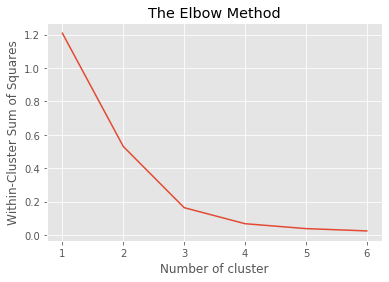

In [33]:
wcss = []
# run k-means clustering
M_grouped_clustering = FFR.drop('Neighborhood', 1)
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=4).fit(M_grouped_clustering)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
# check cluster labels generated for each row in the dataframe
wcss

no_of_cluster = range(1,7)
plt.plot(no_of_cluster,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

In [34]:
# set number of clusters
kclusters = 3
M_grouped_clustering = FFR.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(M_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 2, 0])

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
M_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
M_merged = M_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location')

M_merged.head()# check the last columns!

,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,19.151622,72.854981,1.0,Indian Restaurant,Lounge,Chinese Restaurant,Pizza Place,Electronics Store,Sporting Goods Shop,Plaza,Fast Food Restaurant,Dessert Shop,Farm
2,Aareymilk Colony,400065,19.180136,72.908812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agripada,400011,18.975302,72.824898,0.0,Soccer Field,Athletics & Sports,Coffee Shop,Platform,Bakery,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
4,Airport,400099,19.090201,72.863808,0.0,Airport,Airport Service,Yoga Studio,Dim Sum Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Ambewadi,400004,19.186776,72.859313,0.0,Women's Store,Department Store,Electronics Store,Indian Restaurant,Business Service,Clothing Store,Creperie,Dog Run,Field,Fast Food Restaurant


In [36]:
M_merged.dropna(subset=["Cluster Labels"], axis =0 , inplace =True)

In [37]:
M_merged.astype({"Cluster Labels": "int32"}).head()

,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,19.151622,72.854981,1,Indian Restaurant,Lounge,Chinese Restaurant,Pizza Place,Electronics Store,Sporting Goods Shop,Plaza,Fast Food Restaurant,Dessert Shop,Farm
3,Agripada,400011,18.975302,72.824898,0,Soccer Field,Athletics & Sports,Coffee Shop,Platform,Bakery,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
4,Airport,400099,19.090201,72.863808,0,Airport,Airport Service,Yoga Studio,Dim Sum Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Ambewadi,400004,19.186776,72.859313,0,Women's Store,Department Store,Electronics Store,Indian Restaurant,Business Service,Clothing Store,Creperie,Dog Run,Field,Fast Food Restaurant
6,Andheri,400053,19.119698,72.846420,1,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Bakery,Food Court,Restaurant,Yoga Studio,Diner,Farm,Falafel Restaurant


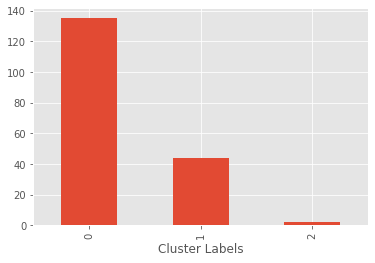

In [38]:
M_merged1 = M_merged.astype({"Cluster Labels": "int32"}).groupby(["Cluster Labels"]).count()
M_merged1["Pincode"].plot(kind = "bar")
plt.show()

In [39]:
# create map
map_clusters = folium.Map(location=[19.0760, 72.8777], zoom_start=10.75)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(M_merged['Latitude'], M_merged['Longitude'], M_merged['Location'], M_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [40]:
M_merged.loc[M_merged['Cluster Labels'] == 0, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,400011,Soccer Field,Athletics & Sports,Coffee Shop,Platform,Bakery,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
4,400099,Airport,Airport Service,Yoga Studio,Dim Sum Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,400004,Women's Store,Department Store,Electronics Store,Indian Restaurant,Business Service,Clothing Store,Creperie,Dog Run,Field,Fast Food Restaurant
9,400037,Gym / Fitness Center,Grocery Store,Trail,Multiplex,Indian Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
11,400053,Bar,Coffee Shop,Athletics & Sports,Pizza Place,Falafel Restaurant,Bowling Alley,Snack Place,Burger Joint,Pub,Metro Station
12,400003,Hotel,Yoga Studio,Dessert Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Electronics Store,Donut Shop
13,400051,Indian Restaurant,Seafood Restaurant,Bar,Coffee Shop,Café,Chinese Restaurant,Flea Market,Bakery,Sandwich Place,Athletics & Sports
14,400003,Indian Restaurant,Convenience Store,Ice Cream Shop,Middle Eastern Restaurant,Electronics Store,Restaurant,BBQ Joint,Café,Indian Sweet Shop,Dessert Shop
15,400050,Indian Restaurant,Café,Chinese Restaurant,Bakery,Pub,Gourmet Shop,Bar,Coffee Shop,Asian Restaurant,Clothing Store
17,400090,Coffee Shop,Clothing Store,Food Truck,Department Store,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


In [41]:
M_merged.loc[M_merged['Cluster Labels'] == 1, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,400029,Indian Restaurant,Lounge,Chinese Restaurant,Pizza Place,Electronics Store,Sporting Goods Shop,Plaza,Fast Food Restaurant,Dessert Shop,Farm
6,400053,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Bakery,Food Court,Restaurant,Yoga Studio,Diner,Farm,Falafel Restaurant
7,400069,Hotel,Indian Restaurant,Gym Pool,Bar,Bus Station,Shopping Mall,Camera Store,Pizza Place,Fast Food Restaurant,Chinese Restaurant
8,400058,Sandwich Place,Indian Restaurant,Fast Food Restaurant,Bakery,Food Court,Restaurant,Yoga Studio,Diner,Farm,Falafel Restaurant
16,400051,Indian Restaurant,Fast Food Restaurant,Pizza Place,Bus Station,Restaurant,Indie Movie Theater,Café,Spa,General Entertainment,Chinese Restaurant
20,400007,Pizza Place,Fast Food Restaurant,Bar,Café,Yoga Studio,Dim Sum Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
24,400066,Gym,ATM,Fast Food Restaurant,Indian Restaurant,Auto Garage,Diner,Field,Farmers Market,Farm,Falafel Restaurant
27,400020,Fast Food Restaurant,Hotel,Ice Cream Shop,Indian Restaurant,Café,Coffee Shop,Bookstore,Movie Theater,Train Station,Cricket Ground
29,400093,Hotel,Restaurant,Fast Food Restaurant,Multiplex,Pizza Place,Asian Restaurant,Indian Restaurant,Café,Seafood Restaurant,Salon / Barbershop
33,400004,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Train Station,Juice Bar,Coffee Shop,Ice Cream Shop,Multiplex,Bus Station,Breakfast Spot,Italian Restaurant


In [42]:
M_merged.loc[M_merged['Cluster Labels'] == 2, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,400005,Fast Food Restaurant,Department Store,Yoga Studio,Dim Sum Restaurant,Field,Farmers Market,Farm,Falafel Restaurant,Event Space,Electronics Store
142,400060,Fast Food Restaurant,Pedestrian Plaza,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Dog Run
